In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.signal

from datetime import date
import time

from random import seed
from random import random
import random
import os, os.path
import shutil

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow

import h5py
import sys
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
sys.path.append("C:\\Users\\kirti\\Documents\\NASA_Codes\\Python_codes\\")
import NASA_core as nc
# import NASA_plot_core.py as rcp

In [90]:
data_dir = "C:\\Users\\kirti\\Documents\\Nitrogen_data\\"

fName="Corn_Potato_Sent_2020-01-01_2021-01-01.csv"
potatpCornRed = pd.read_csv(data_dir + fName)

meta=pd.read_csv(data_dir + "corn_potato_data2020.csv")

In [91]:
potatpCornRed.head(2)

,ID,CropTyp,CIRed,system_start_time
0,6851_WSDA_SF_2020,Potato,NaN,NaN
1,10252_WSDA_SF_2020,Potato,NaN,NaN


In [92]:
potatpCornRed.dropna(subset=['CIRed'], inplace=True)

In [93]:
potatpCornRed.CropTyp.unique()

array(['Potato', 'Corn, Field', 'Corn, Sweet', 'Potato Seed', 'Corn Seed'],
      dtype=object)

In [94]:
potato = potatpCornRed[potatpCornRed.CropTyp.isin(["Potato Seed", "Potato"])].copy()
corn = potatpCornRed[potatpCornRed.CropTyp.isin(['Corn, Field', 'Corn, Sweet', 'Corn Seed'])].copy()

potato.reset_index(drop=True, inplace=True)
corn.reset_index(drop=True, inplace=True)

In [95]:
corn["chl"] =corn["CIRed"]* 6.68
potato.loc[:, 'chl'] = potato.loc[:, 'CIRed']*0.8013

corn["chl"] =corn["chl"]-0.67
potato.loc[:, 'chl'] = potato.loc[:, 'chl']-0.4704

corn_potato = pd.concat([corn, potato])
corn_potato.reset_index(drop=True, inplace=True)

In [96]:
corn_potato["nit"] = corn_potato["chl"]*4.73+0.27
corn_potato.head(2)

,ID,CropTyp,CIRed,system_start_time,chl,nit
0,210692_WSDA_SF_2020,"Corn, Field",0.093239,1.577906e+12,-0.047166,0.046906
1,210693_WSDA_SF_2020,"Corn, Field",0.084038,1.577906e+12,-0.108629,-0.243814


In [97]:
corn_potato = nc.add_human_start_time_by_system_start_time(corn_potato)
corn_potato.head(2)

,ID,CropTyp,CIRed,system_start_time,chl,nit,human_system_start_time
0,210692_WSDA_SF_2020,"Corn, Field",0.093239,1.577906e+12,-0.047166,0.046906,2020-01-01
1,210693_WSDA_SF_2020,"Corn, Field",0.084038,1.577906e+12,-0.108629,-0.243814,2020-01-01


In [103]:
potato_nit_min=corn_potato[corn_potato.CropTyp.isin(["Potato Seed", "Potato"])].nit.min()
potato_nit_max=corn_potato[corn_potato.CropTyp.isin(["Potato Seed", "Potato"])].nit.max()

corn_nit_min=corn_potato[~corn_potato.CropTyp.isin(["Potato Seed", "Potato"])].nit.min()
corn_nit_max=corn_potato[~corn_potato.CropTyp.isin(["Potato Seed", "Potato"])].nit.max()


IDs=corn_potato.ID.unique()

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


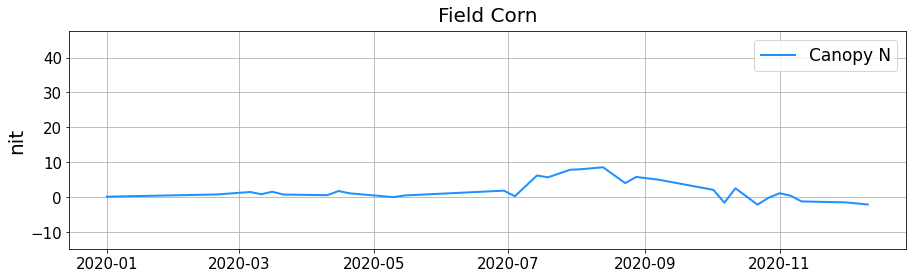

In [119]:
size = 20
title_FontSize = 10
legend_FontSize = 14
tick_FontSize = 18
label_FontSize = 14

params = {'legend.fontsize': 17,
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)

def plot_oneColumn_CropTitle_scatter(raw_dt, ax, titlee, idx="NDVI", 
                                     _label = "raw", _color="red", 
                                     _marker_shape="+",
                                     marker_size=60, y_min=-1, y_max=1):

    ax.plot(raw_dt['human_system_start_time'], raw_dt[idx], c=_color, linewidth=2,
                label=_label);

    ax.set_title(titlee)
    ax.set_ylabel(idx, fontsize=20) # , labelpad=20); # fontsize = label_FontSize,
    ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
    ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
    ax.legend(loc="upper right");
    # plt.yticks(np.arange(0, 1, 0.2))
    # ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.set_ylim(y_min-0.1, y_max+0.1)

    


indeks="nit"

curr = corn_potato[corn_potato.ID == _id].copy()
curr.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
curr_meta = meta[meta.ID==_id]
titlee = " ".join(curr_meta.CropTyp.unique()[0].split(", ")[::-1])

fig, axs = plt.subplots(1, 1, figsize=(15, 4), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
axs.grid(True);
plot_oneColumn_CropTitle_scatter(raw_dt = curr, ax=axs, idx=indeks, titlee=titlee,
                                 _label = "Canopy N", marker_size=40,
                                 _color="dodgerblue", 
                                 _marker_shape=style_dict["landsat"],
                                y_min=corn_nit_min, y_max=corn_nit_max)

array(['Clallam'], dtype=object)